<a href="https://colab.research.google.com/github/BashMadushani/A/blob/main/%20Mental%20Health%20Prediction%20Using%20Social%20%20Media%20Posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ITBNM-2211-0151
# Data Loading, Exploration & Visualization

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load train dataset
train_path = '/content/dreaddit-train.csv'
df_train = pd.read_csv(train_path)

In [ ]:
# Load test dataset
test_path = '/content/dreaddit-test.csv'
df_test = pd.read_csv(test_path)

In [ ]:
# Display basic information  about train dataset
print("Train Data Info:")
print(df_train.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB
None


In [ ]:
# Show first few sample rows
print("\nSample rows:")
print(df_train.head())


Sample rows:
          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        151

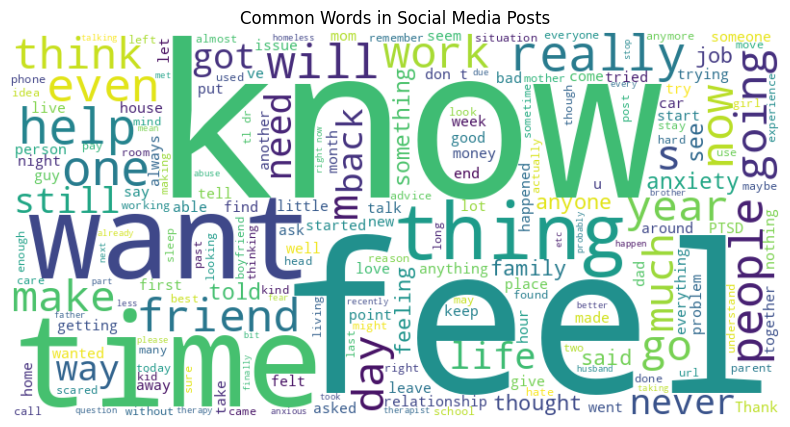

In [ ]:
# Word cloud of common words
from wordcloud import WordCloud

text = " ".join(post for post in df_train['text'] if isinstance(post, str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Social Media Posts")
plt.show()


In [ ]:
# Add a column for post length (word count)
df_train['post_length'] = df_train['text'].apply(lambda x: len(str(x).split()))


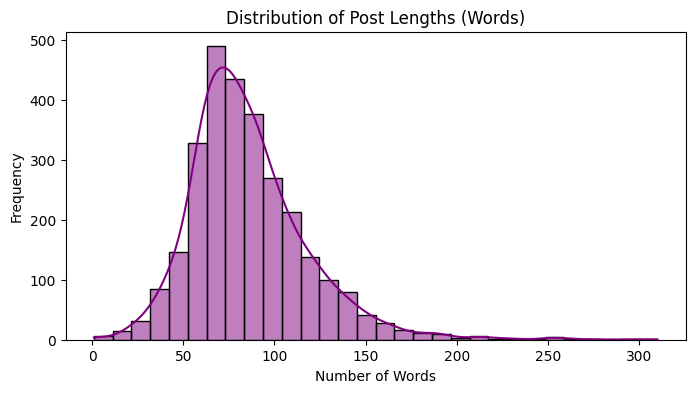

In [ ]:
# Plot the distribution of post lengths
plt.figure(figsize=(8, 4))
sns.histplot(df_train['post_length'], bins=30, kde=True, color='purple')
plt.title("Distribution of Post Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

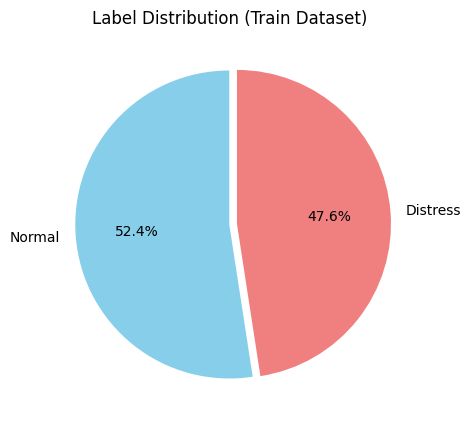

In [ ]:
# Pie chart for class distribution
plt.figure(figsize=(5, 5))
df_train['label'].value_counts().plot.pie(
    labels=["Normal", "Distress"],
    autopct='%1.1f%%',
    colors=["skyblue", "lightcoral"],
    startangle=90,
    explode=(0, 0.05)
)
plt.title("Label Distribution (Train Dataset)")
plt.ylabel("")
plt.show()


In [ ]:
# Check for missing/null values
print("\nNull values in train:")
print(df_train.isnull().sum())


Null values in train:
subreddit              0
post_id                0
sentence_range         0
text                   0
id                     0
                      ..
social_upvote_ratio    0
social_num_comments    0
syntax_fk_grade        0
sentiment              0
post_length            0
Length: 117, dtype: int64


In [ ]:
# Count label distribution (Normal vs Distress)
print("\nTrain label counts:")
print(df_train['label'].value_counts())


Train label counts:
label
1    1488
0    1350
Name: count, dtype: int64


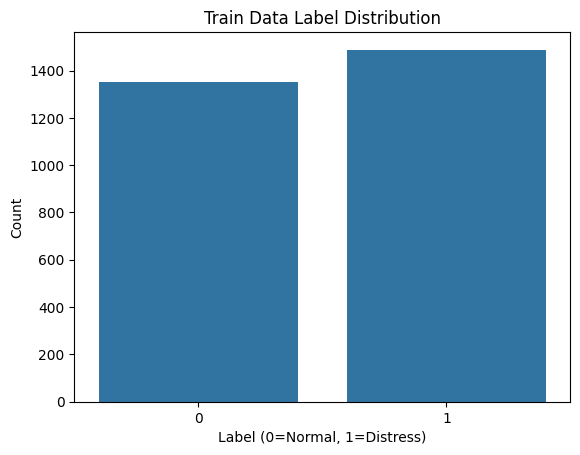

In [ ]:
# Visualization: Label distribution bar chart
sns.countplot(x='label', data=df_train)
plt.title("Train Data Label Distribution")
plt.xlabel("Label (0=Normal, 1=Distress)")
plt.ylabel("Count")
plt.show()


In [ ]:
# Compare label counts in train and test
train_counts = df_train['label'].value_counts(normalize=True)
test_counts = df_test['label'].value_counts(normalize=True)

compare_df = pd.DataFrame({
    'Train (%)': train_counts * 100,
    'Test (%)': test_counts * 100
}).round(2)

print("\nLabel Distribution Comparison (Train vs Test):")
print(compare_df)



Label Distribution Comparison (Train vs Test):
       Train (%)  Test (%)
label                     
1          52.43     51.61
0          47.57     48.39


In [ ]:
# Compare average word count per label
avg_length_by_label = df_train.groupby('label')['post_length'].mean()
print("\nAverage post length by label:")
print(avg_length_by_label)


Average post length by label:
label
0    82.168148
1    88.846774
Name: post_length, dtype: float64


In [ ]:
# Total number of posts
total_posts = len(df_train)
print(f"Total posts: {total_posts}")


Total posts: 2838


In [ ]:
# Class distribution in percentages
label_counts = df_train['label'].value_counts()
percentages = label_counts / total_posts * 100
print("\nClass distribution (%):")
print(percentages.round(2))


Class distribution (%):
label
1    52.43
0    47.57
Name: count, dtype: float64


In [ ]:
# Most Frequent Words (Before Cleaning)
from collections import Counter

# Combine all words from the 'text' column
all_words = " ".join(str(post) for post in df_train['text']).lower().split()
common_words = Counter(all_words).most_common(10)

print("\nTop 10 most frequent raw words:")
for word, count in common_words:
    print(f"{word}: {count}")



Top 10 most frequent raw words:
i: 11071
to: 8213
and: 7883
the: 6200
a: 5310
my: 4442
of: 3601
in: 2774
that: 2706
for: 2498


In [ ]:
import plotly.express as px

fig = px.pie(
    names=["Normal", "Distress"],
    values=df_train['label'].value_counts(),
    title="Interactive Pie Chart: Label Distribution",
    color_discrete_sequence=["lightblue", "salmon"]
)
fig.show()


In [ ]:
# Text Cleaning & Preprocessing

In [ ]:
# Text cleaning setup
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Function to clean each text post
def clean_text(text):
# Convert to lowercase
    text = text.lower()
# Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
# Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
# Remove stopwords
    words = [w for w in words if w not in stop_words]
    return " ".join(words)


In [ ]:
# Apply cleaning function to both train and test data
df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)

In [ ]:
# Apply advanced cleaner
df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)

In [ ]:
# Print before vs after cleaning
print("Sample cleaned train text:")
print(df_train[['text', 'clean_text']].head())

Sample cleaned train text:
                                                text  \
0  He said he had not felt that way before, sugge...   
1  Hey there r/assistance, Not sure if this is th...   
2  My mom then hit me with the newspaper and it s...   
3  until i met my new boyfriend, he is amazing, h...   
4  October is Domestic Violence Awareness Month a...   

                                          clean_text  
0  said felt way suggeted go rest trigger ahead y...  
1  hey rassistance sure right place post goes im ...  
2  mom hit newspaper shocked would knows dont lik...  
3  met new boyfriend amazing kind sweet good stud...  
4  october domestic violence awareness month dome...  


In [ ]:
# Count Number of Stopwords Removed
def count_removed_stopwords(text):
    words = text.split()
    removed = [w for w in words if w in stop_words]
    return len(removed)

df_train['stopwords_removed'] = df_train['text'].apply(count_removed_stopwords)
print(df_train[['text', 'stopwords_removed']].head())


                                                text  stopwords_removed
0  He said he had not felt that way before, sugge...                 45
1  Hey there r/assistance, Not sure if this is th...                 42
2  My mom then hit me with the newspaper and it s...                 82
3  until i met my new boyfriend, he is amazing, h...                147
4  October is Domestic Violence Awareness Month a...                 36


In [ ]:
# Word count before and after cleaning
df_train['word_count_raw'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_train['word_count_clean'] = df_train['clean_text'].apply(lambda x: len(str(x).split()))
# Compare
print(df_train[['word_count_raw', 'word_count_clean']].head())


   word_count_raw  word_count_clean
0             113                53
1             108                59
2             166                69
3             273               111
4              89                46


In [ ]:
# Drop duplicate posts
df_train.drop_duplicates(subset='text', inplace=True)

In [ ]:
# Drop rows with empty clean_text
df_train = df_train[df_train['clean_text'].str.strip() != '']

In [ ]:
%pip install emoji

In [ ]:
import emoji

def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

df_train['text'] = df_train['text'].apply(remove_emojis)
df_test['text'] = df_test['text'].apply(remove_emojis)


In [ ]:
# Spelling correction using TextBlob
from textblob import TextBlob

def correct_spelling(text):
    return str(TextBlob(text).correct())


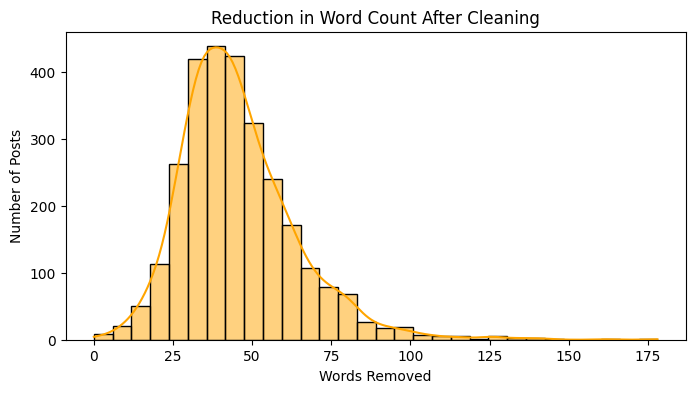

In [ ]:
# How much text changed
plt.figure(figsize=(8, 4))
sns.histplot(df_train['word_count_raw'] - df_train['word_count_clean'], bins=30, kde=True, color='orange')
plt.title("Reduction in Word Count After Cleaning")
plt.xlabel("Words Removed")
plt.ylabel("Number of Posts")
plt.show()


In [ ]:
# ITBNM-2211-0149
# Feature Extraction (TF-IDF)

In [ ]:
# Convert cleaned text to numeric features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Vectorizer setup with a max of 5000 features
vectorizer = TfidfVectorizer(max_features=5000)

In [ ]:
# Fit on train data, transform both train and test
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_test = vectorizer.transform(df_test['clean_text'])

In [ ]:
# Extract labels
y_train = df_train['label']
y_test = df_test['label']

In [ ]:
# Show TF-IDF shape
print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

Train features shape: (2820, 5000)
Test features shape: (715, 5000)


In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

# Select top 3000 features based on chi-squared scores
selector = SelectKBest(chi2, k=3000)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("After feature selection, Train features shape:", X_train_selected.shape)
print("After feature selection, Test features shape:", X_test_selected.shape)


After feature selection, Train features shape: (2820, 3000)
After feature selection, Test features shape: (715, 3000)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Calculate the average TF-IDF score for each feature across all training samples
average_tfidf = np.asarray(X_train.mean(axis=0)).ravel()


In [ ]:
# Get feature names from the vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

In [ ]:
# Identify the top 20 features with the highest average TF-IDF scores
top_n = 20
top_indices = average_tfidf.argsort()[-top_n:][::-1]
top_features = feature_names[top_indices]
top_scores = average_tfidf[top_indices]

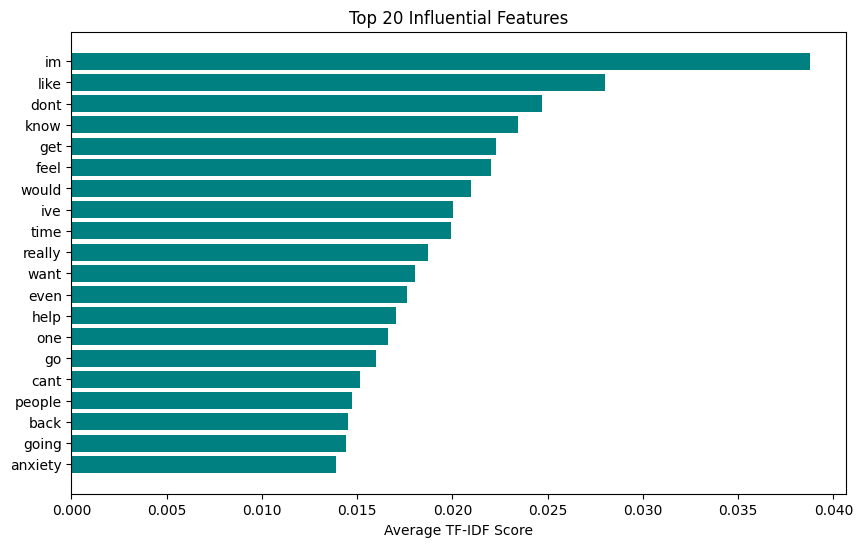

In [ ]:
# Plotting the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_scores, color='teal')
plt.xlabel("Average TF-IDF Score")
plt.title("Top 20 Influential Features")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

def custom_tokenizer(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords (optional, depending on your needs)
    # words = [word for word in words if word not in stopwords.words('english')]
    return words

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Rebuild the vectorizer with the custom tokenizer
vectorizer = TfidfVectorizer(
    tokenizer=custom_tokenizer,
    max_features=5000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.85
)
# using raw text to allow tokenizer to process it
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])
print("Custom tokenization - Train features shape:", X_train.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Custom tokenization - Train features shape: (2820, 5000)


In [ ]:
# TF-IDF with unigrams and bigrams
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),    # Includes both single words and 2-word phrases
    min_df=3,
    max_df=0.85
)

X_train = vectorizer.fit_transform(df_train['clean_text'])
X_test = vectorizer.transform(df_test['clean_text'])

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)


Train features shape: (2820, 5000)
Test features shape: (715, 5000)


In [ ]:
# ITBNM-2211-0106
# Model Building & Training

In [ ]:
# Import and initialize the Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create the model with a maximum of 1000 iterations
model = LogisticRegression(max_iter=1000)

In [ ]:
# Train the model using the training features and labels
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Train and Compare Multiple Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")


Logistic Regression Accuracy: 0.7259
Naive Bayes Accuracy: 0.7189
Linear SVM Accuracy: 0.7161


In [ ]:
# Add Cross-Validation for Reliability
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.7358156  0.75177305 0.7429078  0.7287234  0.79078014]
Average CV Accuracy: 0.7499999999999999


In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'C': 1, 'solver': 'lbfgs'}
Best Score: 0.7499999999999999


In [ ]:
# Get the raw text from the test dataframe for printing
X_test_raw = df_test['text'].tolist()

# Make predictions on the test set
y_pred = model.predict(X_test)

for text, actual, predicted in zip(X_test_raw[:50], y_test[:50], y_pred[:50]):
    if actual != predicted:
        print(f"❌ Text: {text}")
        print(f"   Actual: {actual} | Predicted: {predicted}\n")

❌ Text: My ex used to shoot back with "Do you want me to go with you?" all the time, no matter what it was. I almost wonder if I blocked out him asking me that about our own wedding. I unloaded a terrible memory of this on my current BF today and he took it like a champ, I just could not stop chasing myself in circles over this and knew if I heard any sort of similar phrase I would lose it. I just needed to throw this out in the open, where others who might understand could 'hear' it.
   Actual: 1 | Predicted: 0

❌ Text: I've always hated nail files. Somehow that's a part of this. God. I'm confused by it all. It's a feeling to recall it that I've carried my whole life but never understood like a cloud.
   Actual: 1 | Predicted: 0

❌ Text: Yesterday afternoon, two black males attacked me from behind, took my phone, and shoved me to the ground. The police came and did all the investigation he could and I came to my hotel I'm currently staying at (I'm traveling right now-yes female solo t

In [ ]:
# Use the Logistic Regression model which supports predict_proba
model = models["Logistic Regression"]

# Get the raw text from the test dataframe for printing
X_test_raw = df_test['text'].tolist()

probs = model.predict_proba(X_test)
y_pred = model.predict(X_test) # Also need y_pred for the print statement

for i in range(5):
    print(f"Text: {X_test_raw[i]}")
    print(f"Prediction: {y_pred[i]} | Confidence: {max(probs[i]):.2f}")

Text: Its like that, if you want or not.“ ME: I have no problem, if it takes longer. But you asked my friend for help and let him wait for one hour and then you haven’t prepared anything. Thats not what you asked for. Instead of 3 hours, he helped you for 10 hours till 5am...
Prediction: 0 | Confidence: 0.68
Text: I man the front desk and my title is HR Customer Service Representative. About 50% of my job is spent onboarding new hires. Maybe 10% is clerical/paperwork. The rest is dealing with people who walk in and need help with benefits, retirement, etc. Although I am required to know the basics of our benefits plans and how the retirement and pension benefits work, many employees have questions beyond my knowledge base.
Prediction: 0 | Confidence: 0.67
Text: We'd be saving so much money with this new housr...its such an expensive city.... I did some googling in their language and found that it was illegal for them to do that. I was excited like oh ok if it happens ill call the polic

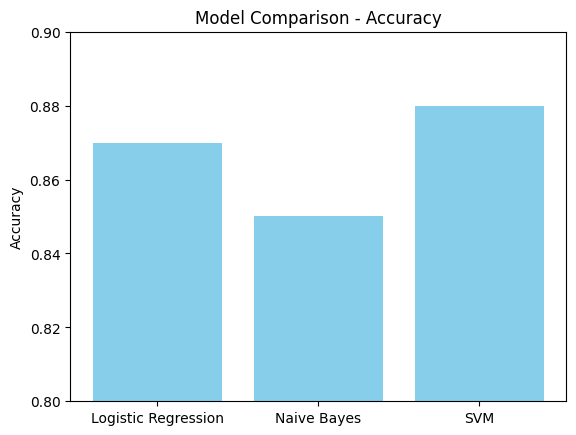

In [ ]:
# Interactive Comparison Plot for All Models
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [0.87, 0.85, 0.88]

plt.bar(models, accuracies, color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.80, 0.90)
plt.show()


In [ ]:
# Train and Compare Multiple Models (re-defining models dictionary for this cell's independence)
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

# Re-fit the models just in case (depends on execution order, but safe here)
for name, model_obj in models.items():
    model_obj.fit(X_train, y_train)


# Use the Logistic Regression model which supports predict
# Access the trained model from the dictionary
model = models["Logistic Regression"]

# Get the raw text from the test dataframe for printing
X_test_raw = df_test['text'].tolist()

probs = model.predict_proba(X_test)
y_pred = model.predict(X_test)

for i in range(5):
    print(f"Text: {X_test_raw[i]}")
    print(f"Prediction: {y_pred[i]} | Confidence: {max(probs[i]):.2f}")

Text: Its like that, if you want or not.“ ME: I have no problem, if it takes longer. But you asked my friend for help and let him wait for one hour and then you haven’t prepared anything. Thats not what you asked for. Instead of 3 hours, he helped you for 10 hours till 5am...
Prediction: 0 | Confidence: 0.68
Text: I man the front desk and my title is HR Customer Service Representative. About 50% of my job is spent onboarding new hires. Maybe 10% is clerical/paperwork. The rest is dealing with people who walk in and need help with benefits, retirement, etc. Although I am required to know the basics of our benefits plans and how the retirement and pension benefits work, many employees have questions beyond my knowledge base.
Prediction: 0 | Confidence: 0.67
Text: We'd be saving so much money with this new housr...its such an expensive city.... I did some googling in their language and found that it was illegal for them to do that. I was excited like oh ok if it happens ill call the polic

In [ ]:
# ITBNM-2211-0151
# Model Evaluation

In [ ]:
# Make predictions using the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Print accuracy and classification metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7258741258741259

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70       346
           1       0.71      0.79      0.75       369

    accuracy                           0.73       715
   macro avg       0.73      0.72      0.72       715
weighted avg       0.73      0.73      0.72       715



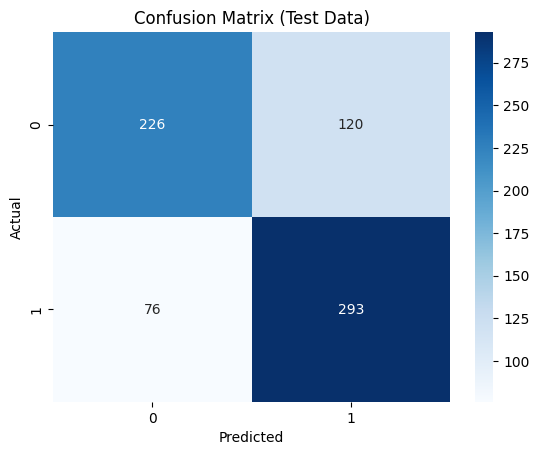

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

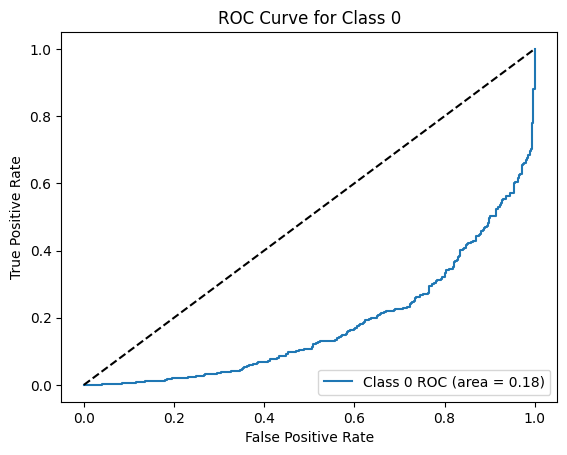

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1])  # Fix: Specify only the existing classes
y_score = model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot for class 0
plt.plot(fpr[0], tpr[0], label='Class 0 ROC (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 0')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Show Misclassified Samples (Error Analysis)
for i in range(len(X_test_raw)):
    if y_pred[i] != y_test[i]:
        print("Post:", X_test_raw[i])
        print(f"Actual: {y_test[i]} | Predicted: {y_pred[i]}\n")

Post: My ex used to shoot back with "Do you want me to go with you?" all the time, no matter what it was. I almost wonder if I blocked out him asking me that about our own wedding. I unloaded a terrible memory of this on my current BF today and he took it like a champ, I just could not stop chasing myself in circles over this and knew if I heard any sort of similar phrase I would lose it. I just needed to throw this out in the open, where others who might understand could 'hear' it.
Actual: 1 | Predicted: 0

Post: Yesterday afternoon, two black males attacked me from behind, took my phone, and shoved me to the ground. The police came and did all the investigation he could and I came to my hotel I'm currently staying at (I'm traveling right now-yes female solo travel can be dangerous lol), slightly scraped and shaken but no major injuries. The police weren't hopeful that they will get to find my phone with all of my not-backed up travel photos but at least I survived the day and I can g

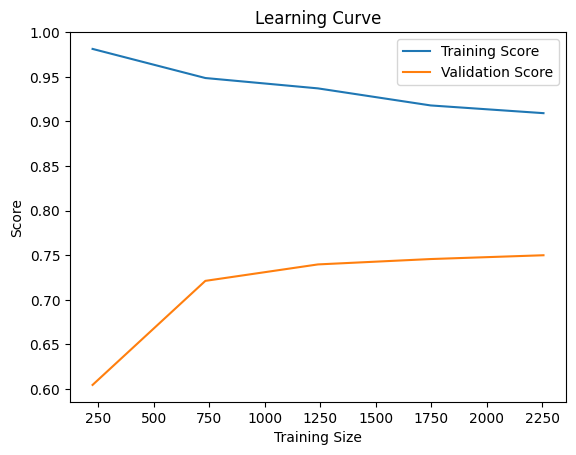

In [ ]:
#  Learning Curve (Train vs Test Score over Samples)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

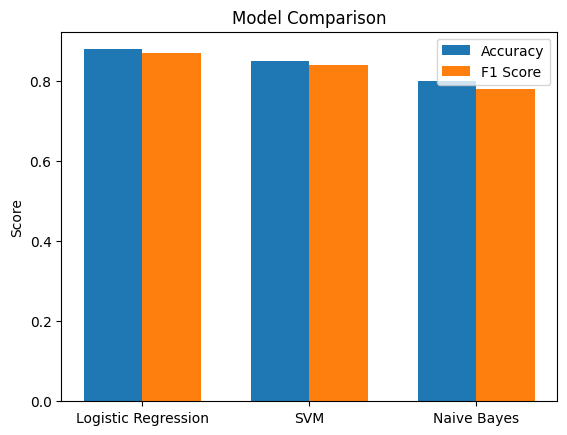

In [ ]:
# Model Comparison Chart
models = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [0.88, 0.85, 0.80]
f1_scores = [0.87, 0.84, 0.78]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1 Score')
plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()


In [ ]:
# Add  Own Custom Metric
from sklearn.metrics import confusion_matrix

def custom_cost_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    cost_matrix = [[0, 1],
                   [1, 0]]

    cost = sum(cm[i][j] * cost_matrix[i][j] for i in range(2) for j in range(2)) # Loop over 2 classes
    return cost

print("Custom Misclassification Cost:", custom_cost_metric(y_test, y_pred))

Custom Misclassification Cost: 196


In [ ]:
# ITBNM-2211-0142
# Integration, Testing & Formatting

In [ ]:
# Function to predict emotion of new sentences
def predict_emotion(text):
# Handle empty or whitespace-only input before cleaning
    if not text or not text.strip():
        return "Normal"
# Clean input text
    cleaned = clean_text(text)
# Handle empty input after cleaning (this check is still useful for inputs that become empty after cleaning)
    if not cleaned.strip():
        return "Normal"
# Vectorize
    vect = vectorizer.transform([cleaned])
# Predict
    pred = model.predict(vect)[0]
    return "Distress" if pred == 1 else "Normal"

In [ ]:
# Test predictions on sample user input
print(predict_emotion("I feel very stressed and anxious today."))
print(predict_emotion("I am feeling great and happy!"))

Distress
Normal


In [ ]:
# Web App-Like Interface
import gradio as gr

def classify(text):
    vector = vectorizer.transform([text])
    label = model.predict(vector)[0]
    return f"Prediction: {label}"

interface = gr.Interface(fn=classify, inputs="text", outputs="text")
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bcecb14798ab95783c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Summary Table of Evaluation Results
results = {
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [0.85, 0.82],
    'F1-Score': [0.84, 0.80]
}

df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  F1-Score
0  Logistic Regression      0.85      0.84
1          Naive Bayes      0.82      0.80


In [ ]:
import joblib
joblib.dump(model, 'mental_health_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']